<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Churn_prediction_comparison_in_ML_%26_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('https://raw.githubusercontent.com/nicknochnack/Tensorflow-in-10-Minutes/main/Churn.csv')

In [41]:
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [42]:
X=pd.get_dummies(df.drop(['Churn','Customer ID'],axis=1))
y=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [43]:
X.sample(2)

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_995.35,Total Charges_996.45,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9
4504,0,17,94.4,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
902,0,9,98.3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [45]:
'''from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
ss.transform(X_train)
ss.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\nss = StandardScaler()\nss.fit(X_train)\nss.transform(X_train)\nss.transform(X_test)'

In [46]:
'''from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))'''

'from sklearn.metrics import accuracy_score\nfrom sklearn.linear_model import LogisticRegressionCV\nmodel = LogisticRegressionCV()\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)\nprint(accuracy_score(y_test, y_pred))'

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

75.65649396735273


In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

77.64371894960965


In [49]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

77.43080198722498


In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

75.65649396735273


In [51]:
len(X.columns)

6575

In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [85]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [91]:
History = model.fit(X_train,y_train, epochs=50, batch_size=10, validation_data = (X_test, y_test))

Epoch 1/50
564/564 [==============================] - 2s 4ms/step - loss: 0.4668 - accuracy: 0.7789 - val_loss: 0.4594 - val_accuracy: 0.7842
Epoch 2/50
564/564 [==============================] - 2s 4ms/step - loss: 0.4613 - accuracy: 0.7824 - val_loss: 0.4909 - val_accuracy: 0.7637
Epoch 3/50
564/564 [==============================] - 2s 4ms/step - loss: 0.4554 - accuracy: 0.7814 - val_loss: 0.4605 - val_accuracy: 0.7743
Epoch 4/50
564/564 [==============================] - 3s 6ms/step - loss: 0.4523 - accuracy: 0.7867 - val_loss: 0.4997 - val_accuracy: 0.7502
Epoch 5/50
564/564 [==============================] - 2s 4ms/step - loss: 0.4521 - accuracy: 0.7881 - val_loss: 0.4637 - val_accuracy: 0.7708
Epoch 6/50
564/564 [==============================] - 2s 4ms/step - loss: 0.4501 - accuracy: 0.7890 - val_loss: 0.4831 - val_accuracy: 0.7622
Epoch 7/50
564/564 [==============================] - 2s 4ms/step - loss: 0.4478 - accuracy: 0.7867 - val_loss: 0.4751 - val_accuracy: 0.7686
Epoch 

In [101]:
y_pred = model.predict(X_test)
y_pred = [1 if val > 0.5  else 0 for val in y_pred]
print('Accuracy of model using ANN :',accuracy_score(y_test, y_pred)*100)

45/45 [==============================] - 0s 4ms/step
Accuracy of model using ANN : 78.92122072391767


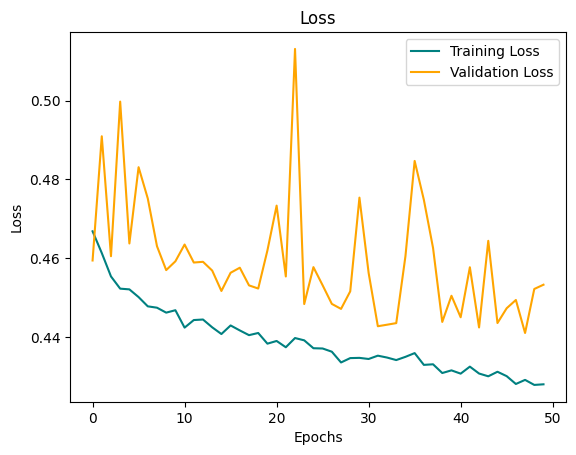

In [93]:
fig = plt.figure()
plt.plot(History.history['loss'], color='teal', label='Training Loss')
plt.plot(History.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

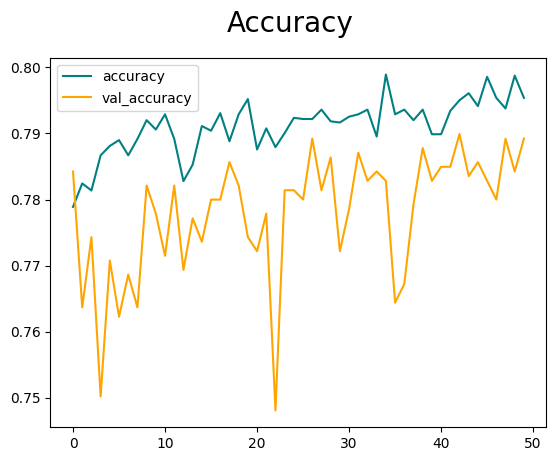

In [94]:
fig = plt.figure()
plt.plot(History.history['accuracy'], color='teal', label='accuracy')
plt.plot(History.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## **Accuracy of model using ANN is approx 79%. Other then ANN, Random forest works well in this dataset.**